## Preprocessing and cleaning the data

In [83]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [84]:
df=pd.read_csv('/content/data.csv')
df

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97995,97995,0.237591,1.657034,-0.689282,0.313710,-0.299039,0.329139,1.607378,5,7,...,-0.290116,-0.258141,-0.973640,1.369508,0.391055,2.152426,-0.208944,-1.475403,0.298448,0.445039
97996,97996,0.322696,0.710411,0.562625,-1.321713,-0.357708,0.182024,0.178558,3,9,...,0.117687,1.388242,0.342400,1.680537,-0.860409,0.579165,1.162692,0.134994,0.994666,0.727642
97997,97997,-0.249364,-0.459545,1.886122,-1.340310,0.195029,-0.559520,-0.379767,8,9,...,-0.850223,-1.787648,-1.268115,-1.508330,1.945622,1.503645,0.194968,2.142693,1.646042,0.641466
97998,97998,0.311408,2.185237,0.761367,0.436723,0.464967,0.062321,-0.334025,1,8,...,-0.010839,1.118906,1.565765,0.358480,0.547615,1.224439,-0.537998,-1.610954,-0.616227,-0.066211


Tried some vizualization for our big dataset

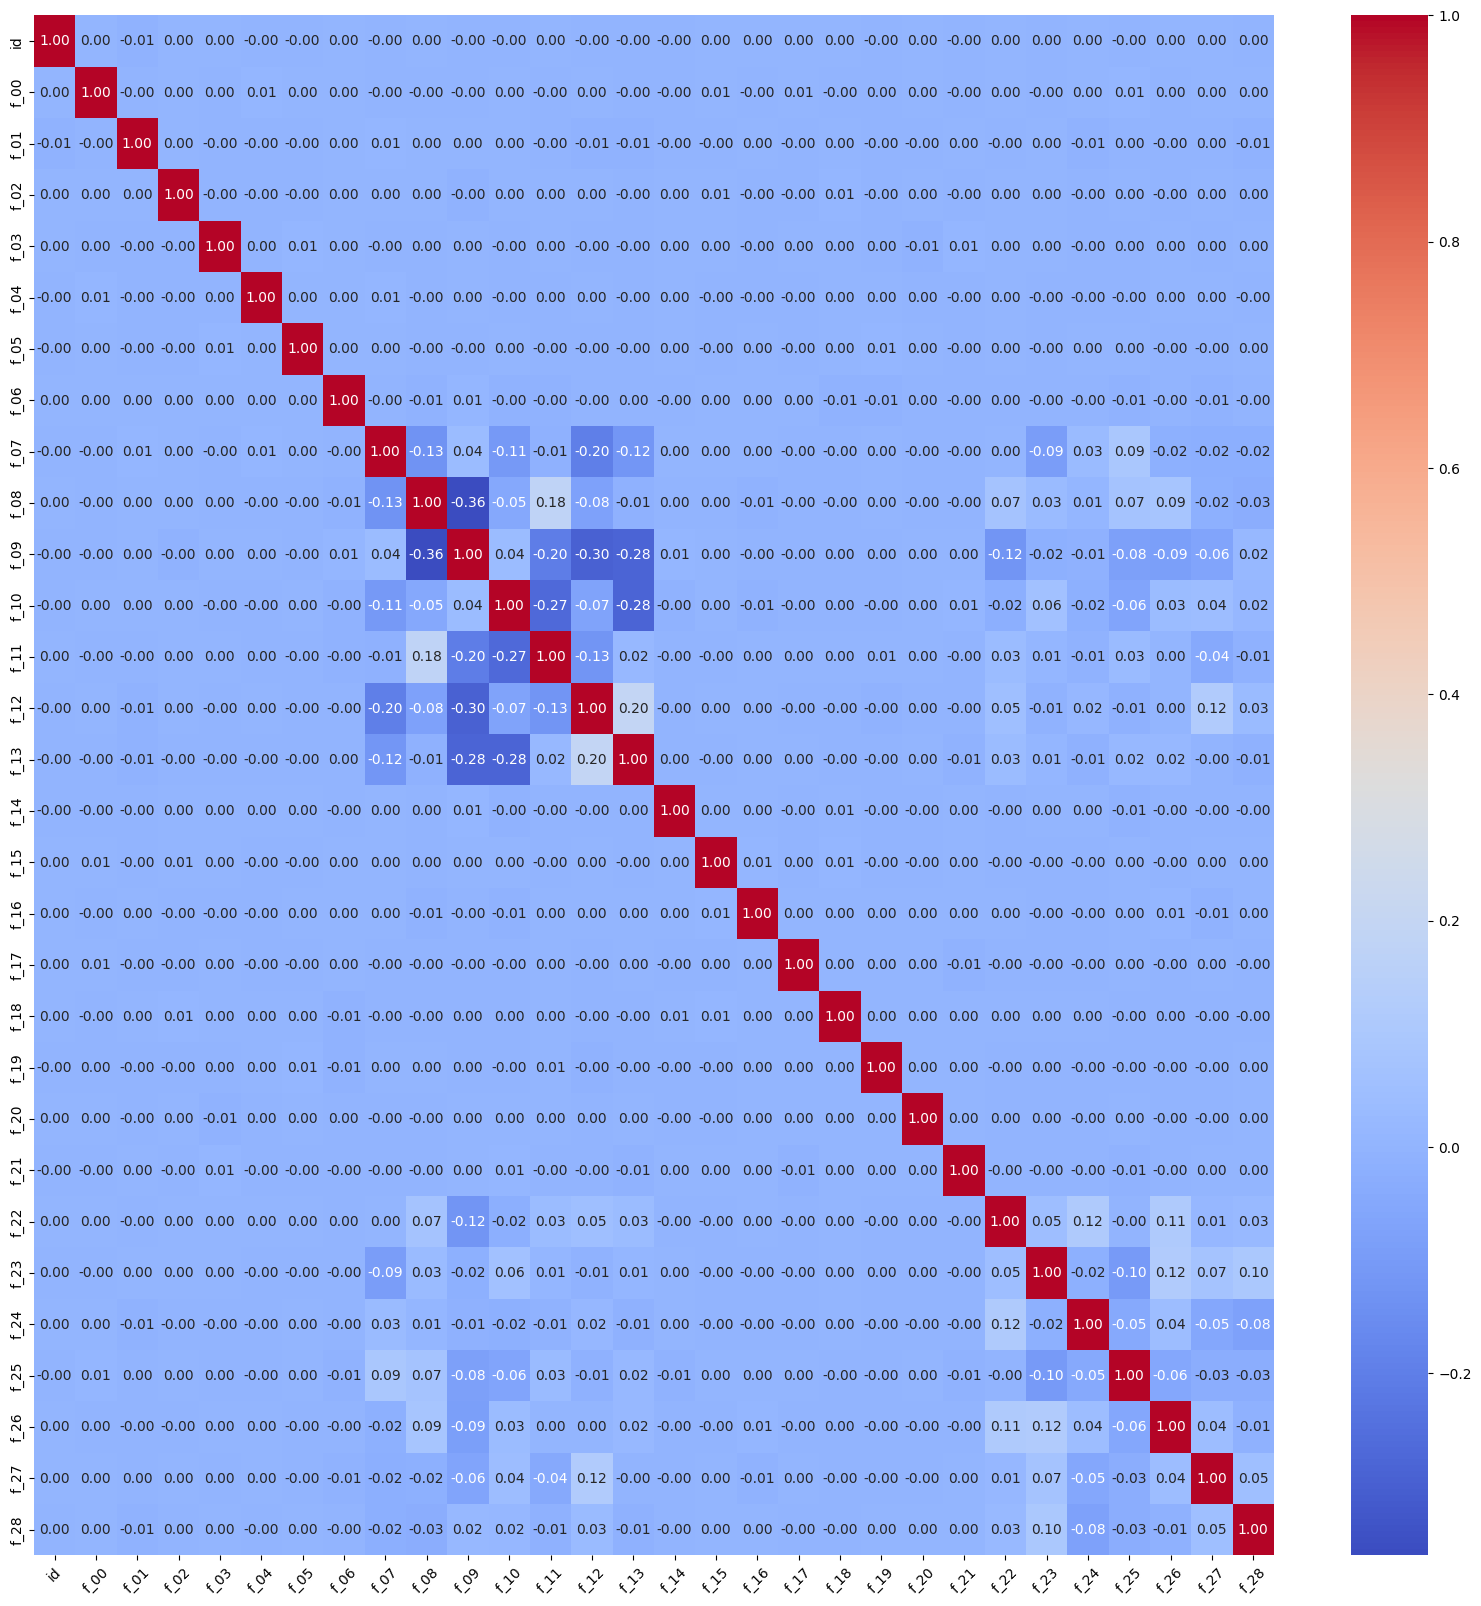

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt



# Compute the correlation matrix
corr = df.corr()

# Set up the figure
fig, ax = plt.subplots(figsize=(20,20))

# Generate the heatmap
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f',
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [86]:
df.describe()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
count,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,...,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000
mean,48999.500000,0.001220,0.005580,-0.001042,-0.000700,-0.003522,-0.001612,-0.003042,5.545918,6.763061,...,-0.004513,-0.000515,-0.001670,-0.038752,-0.220002,0.166434,-0.064309,-0.062540,0.098472,-0.230910
std,28290.307527,1.002801,1.000742,1.001373,1.000422,1.003061,1.000532,0.997434,3.691840,4.152348,...,1.004372,1.002962,0.999703,1.477858,1.494836,1.543014,1.576086,1.428055,1.305407,1.528476
min,0.000000,-4.732235,-4.202795,-4.377021,-4.010826,-4.535903,-4.300767,-4.894525,0.000000,0.000000,...,-4.894525,-4.732235,-4.438130,-6.873999,-8.234305,-7.792363,-6.593842,-7.375719,-7.335556,-6.954151
25%,24499.750000,-0.675226,-0.670985,-0.672779,-0.672540,-0.682510,-0.675066,-0.680421,3.000000,4.000000,...,-0.678773,-0.679777,-0.675147,-1.022964,-1.203204,-0.903385,-1.128966,-0.975680,-0.746489,-1.262606
50%,48999.500000,0.002022,0.006650,-0.000324,-0.003185,-0.003307,0.001024,-0.002053,5.000000,6.000000,...,-0.000587,-0.000806,0.000819,-0.056687,-0.219046,0.167074,-0.099221,-0.070852,0.082230,-0.271319
75%,73499.250000,0.677271,0.677746,0.677086,0.672097,0.677589,0.673344,0.668112,8.000000,9.000000,...,0.672149,0.675437,0.676881,0.930158,0.764690,1.217432,0.987684,0.843212,0.925306,0.770516
max,97999.000000,4.490521,4.324974,4.560247,4.399373,4.050549,4.710316,3.998595,32.000000,30.000000,...,4.560247,4.399373,4.135419,6.517721,6.054831,7.527271,7.544731,7.005608,7.205971,6.977150


In [87]:
df.isnull().sum()

id      0
f_00    0
f_01    0
f_02    0
f_03    0
f_04    0
f_05    0
f_06    0
f_07    0
f_08    0
f_09    0
f_10    0
f_11    0
f_12    0
f_13    0
f_14    0
f_15    0
f_16    0
f_17    0
f_18    0
f_19    0
f_20    0
f_21    0
f_22    0
f_23    0
f_24    0
f_25    0
f_26    0
f_27    0
f_28    0
dtype: int64

No null values

`Scale the values of dataset for much more better results`

In [88]:
X=df.drop("id",axis= 1)
#feature scaling
cols = X.columns
ms = MinMaxScaler()
X = ms.fit_transform(X)
X = pd.DataFrame(X,columns=[cols])
X.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0.470880,0.385799,0.562361,0.546940,0.431504,0.558689,0.804339,0.06250,0.433333,0.318182,...,0.467078,0.435327,0.428585,0.431881,0.656229,0.450930,0.546854,0.603894,0.605064,0.557570
1,0.438371,0.439604,0.562946,0.595238,0.335748,0.573136,0.540179,0.06250,0.100000,0.136364,...,0.472326,0.508380,0.309548,0.450616,0.608434,0.623499,0.446892,0.453613,0.543135,0.306763
2,0.600831,0.530897,0.358769,0.402646,0.540544,0.564273,0.773949,0.15625,0.366667,0.113636,...,0.473940,0.342750,0.656568,0.757268,0.570082,0.367093,0.397413,0.605750,0.428078,0.238558
3,0.458790,0.519696,0.519301,0.504429,0.576596,0.341746,0.565985,0.18750,0.066667,0.295455,...,0.583177,0.659253,0.579803,0.590711,0.433370,0.602681,0.331975,0.469007,0.500973,0.516282
4,0.440320,0.370937,0.459521,0.259276,0.494476,0.271661,0.638294,0.25000,0.233333,0.113636,...,0.345402,0.470595,0.555270,0.534534,0.405619,0.604864,0.392484,0.624310,0.476586,0.356527


In [56]:
df2=X
df3=X
df3

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0.470880,0.385799,0.562361,0.546940,0.431504,0.558689,0.804339,0.06250,0.433333,0.318182,...,0.467078,0.435327,0.428585,0.431881,0.656229,0.450930,0.546854,0.603894,0.605064,0.557570
1,0.438371,0.439604,0.562946,0.595238,0.335748,0.573136,0.540179,0.06250,0.100000,0.136364,...,0.472326,0.508380,0.309548,0.450616,0.608434,0.623499,0.446892,0.453613,0.543135,0.306763
2,0.600831,0.530897,0.358769,0.402646,0.540544,0.564273,0.773949,0.15625,0.366667,0.113636,...,0.473940,0.342750,0.656568,0.757268,0.570082,0.367093,0.397413,0.605750,0.428078,0.238558
3,0.458790,0.519696,0.519301,0.504429,0.576596,0.341746,0.565985,0.18750,0.066667,0.295455,...,0.583177,0.659253,0.579803,0.590711,0.433370,0.602681,0.331975,0.469007,0.500973,0.516282
4,0.440320,0.370937,0.459521,0.259276,0.494476,0.271661,0.638294,0.25000,0.233333,0.113636,...,0.345402,0.470595,0.555270,0.534534,0.405619,0.604864,0.392484,0.624310,0.476586,0.356527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97995,0.538866,0.687147,0.412625,0.514201,0.493436,0.513801,0.731116,0.15625,0.233333,0.181818,...,0.486993,0.489957,0.404091,0.615567,0.603631,0.649153,0.451594,0.410276,0.524980,0.531120
97996,0.548093,0.576142,0.552702,0.319744,0.486603,0.497475,0.570450,0.09375,0.300000,0.045455,...,0.530125,0.670252,0.557591,0.638793,0.516049,0.546457,0.548608,0.522255,0.572857,0.551405
97997,0.486066,0.438948,0.700789,0.317533,0.550976,0.415183,0.507669,0.25000,0.300000,0.227273,...,0.427752,0.322461,0.369744,0.400671,0.712424,0.606804,0.480162,0.661859,0.617652,0.545220
97998,0.546869,0.749086,0.574939,0.528828,0.582414,0.484191,0.512812,0.03125,0.266667,0.250000,...,0.516531,0.640757,0.700281,0.540071,0.614587,0.588578,0.428321,0.400851,0.462079,0.494422


##Kmeans clustering

`We will use elbow method`

In [57]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [89]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df2)
y_predicted

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 0, 1, ..., 2, 2, 1], dtype=int32)

In [59]:
df2['cluster']=y_predicted
df2.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,cluster
0,0.470880,0.385799,0.562361,0.546940,0.431504,0.558689,0.804339,0.06250,0.433333,0.318182,...,0.435327,0.428585,0.431881,0.656229,0.450930,0.546854,0.603894,0.605064,0.557570,0
1,0.438371,0.439604,0.562946,0.595238,0.335748,0.573136,0.540179,0.06250,0.100000,0.136364,...,0.508380,0.309548,0.450616,0.608434,0.623499,0.446892,0.453613,0.543135,0.306763,1
2,0.600831,0.530897,0.358769,0.402646,0.540544,0.564273,0.773949,0.15625,0.366667,0.113636,...,0.342750,0.656568,0.757268,0.570082,0.367093,0.397413,0.605750,0.428078,0.238558,0
3,0.458790,0.519696,0.519301,0.504429,0.576596,0.341746,0.565985,0.18750,0.066667,0.295455,...,0.659253,0.579803,0.590711,0.433370,0.602681,0.331975,0.469007,0.500973,0.516282,2
4,0.440320,0.370937,0.459521,0.259276,0.494476,0.271661,0.638294,0.25000,0.233333,0.113636,...,0.470595,0.555270,0.534534,0.405619,0.604864,0.392484,0.624310,0.476586,0.356527,1


Using K-means clustering with `k=3` clusters on our dataset and then we call the km.cluster_centers_ attribute, it gives a numpy array of shape (3, 29) where each row represents the centroid (center) of one of the three clusters.

The number of rows will be equal to the number of clusters we specified, and the number of columns will be equal to the number of features in the dataset.

In [60]:
km.cluster_centers_

array([[0.51252041, 0.49415851, 0.49001516, 0.47721442, 0.52717656,
        0.47685801, 0.54879175, 0.17836957, 0.32073707, 0.14786896,
        0.19993574, 0.41387262, 0.13500945, 0.17292374, 0.49450492,
        0.51482864, 0.50143686, 0.51484374, 0.46694111, 0.51768237,
        0.51824607, 0.51763509, 0.516923  , 0.55970966, 0.51908428,
        0.47712701, 0.51348684, 0.49952604, 0.47547614],
       [0.51384005, 0.49202005, 0.48962228, 0.47617635, 0.52836064,
        0.47681838, 0.55029758, 0.16345913, 0.2023572 , 0.12519039,
        0.2073747 , 0.23805745, 0.25797073, 0.29225378, 0.49305034,
        0.51464072, 0.50337631, 0.51351076, 0.4686127 , 0.51717004,
        0.51774123, 0.51626872, 0.52159843, 0.56133768, 0.52079928,
        0.46386993, 0.51347594, 0.52355215, 0.4844406 ],
       [0.51317254, 0.49521726, 0.48909394, 0.47741374, 0.52790609,
        0.47795475, 0.5513454 , 0.18401956, 0.12878223, 0.35420178,
        0.28890959, 0.1993034 , 0.12916364, 0.11104098, 0.49494361,
  

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

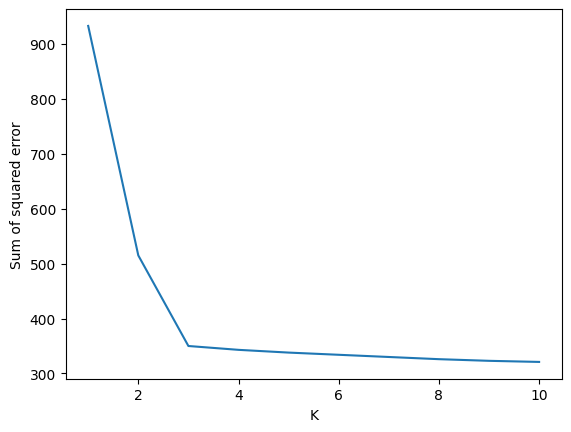

In [61]:
sse = []
k_rng = range(1,11)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df2)
    sse.append(km.inertia_//100)##divided by 100 to get a better picture of elbow plot
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

###From elbow method we got `K=3` as the best number of clusters option

##Density-based spatial clustering of applications with noise (DBSCAN)

`Used PCA to get best 2 components`

In [97]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca_new = pca.fit_transform(df3)
df_new= pd.DataFrame(X_pca_new)
df_new.columns=["New_col1","New_col2"]





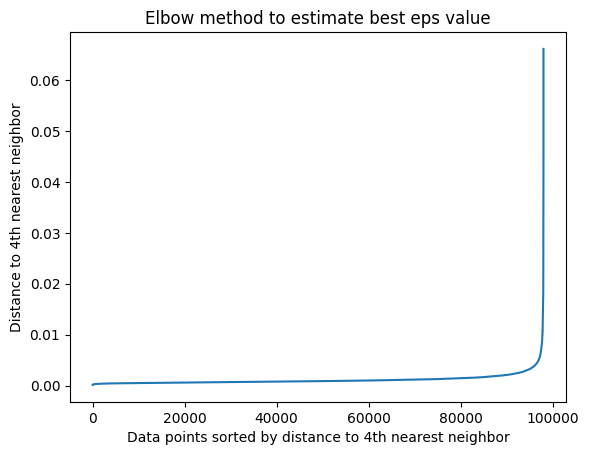

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# create an instance of the NearestNeighbors class with k=4
knn = NearestNeighbors(n_neighbors=4)

# fit the knn model to your data
knn.fit(df_new)

# calculate the distances to the kth nearest neighbor for each point
distances, indices = knn.kneighbors()

# sort the distances in ascending order and plot them
sorted_distances = np.sort(distances[:,3])
plt.plot(sorted_distances)

# use the elbow method to estimate the best value of eps
plt.xlabel("Data points sorted by distance to 4th nearest neighbor")
plt.ylabel("Distance to 4th nearest neighbor")
plt.title("Elbow method to estimate best eps value")
plt.show()


In [ ]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from kneed import KneeLocator
kneedle = KneeLocator(range(len(sorted_distances)), sorted_distances, curve='convex', direction='increasing')
eps = sorted_distances[kneedle.elbow]
print("Estimated value of eps:", eps)


Estimated value of eps: 0.0077878251215122785


##FINDING GOOD ESTIMATE FOR `EPSILON` AND `MIN_SAMPLES`


from above plot we can see that using min_samples<=3 and epsilon=0.06 will be a great option

<Axes: xlabel='New_col1', ylabel='New_col2'>

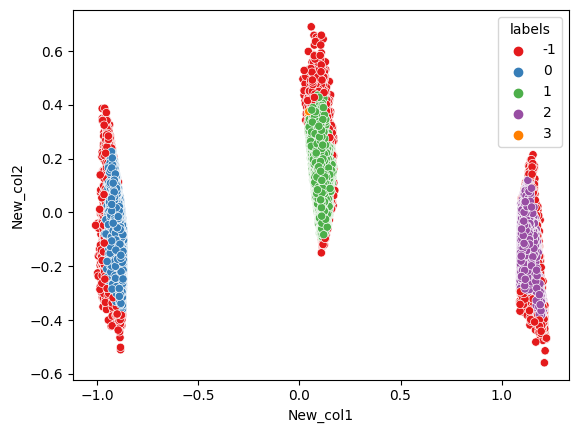

In [68]:
from sklearn.cluster import DBSCAN


# Set the hyperparameters
epsilon = 0.0077878251215122785
min_samples = 30

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
labels = dbscan.fit_predict(df_new)

df_new['labels']=labels
# Print the cluster labels
# print(labels)
# plt.scatter(df_new.iloc[:,0], df_new.iloc[:,1], c=labels, cmap='Dark2')
# plt.title('DBSCAN Clustering with eps={} and min_samples={}'.format(epsilon, min_samples))
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.show()

sns.scatterplot(x=df_new["New_col1"], y=df_new["New_col2"],hue = 'labels',  data=df_new,palette='Set1')

###USED PCA AND AGAIN DID EVERYTHING

`Use components such that 95% of variance is retained`

In [ ]:
from sklearn.decomposition import PCA
X=df2
pca = PCA(0.95)##95% of variance is retained from this .We can also set value for number of principal components but will do it later
X_pca = pca.fit_transform(X)
X_pca.shape


(98000, 24)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


`When we passed 0.90 as the argument of pca means 90% of variance is retained ie. 90% of significant columns were retained after reducing dimensionality`

In [ ]:
pca.explained_variance_ratio_

array([0.62864614, 0.02892734, 0.02160112, 0.01593752, 0.01452455,
       0.01431761, 0.01405449, 0.01366326, 0.01355934, 0.01349213,
       0.01333738, 0.01310652, 0.0128566 , 0.01265724, 0.0125232 ,
       0.01246968, 0.0124526 , 0.01235303, 0.01218506, 0.01194838,
       0.0118149 , 0.01166461, 0.01119684, 0.0110419 ])

In [ ]:
pca.n_components_

24

In [ ]:
X_pca

array([[ 1.10368551, -0.10848299, -0.00161294, ...,  0.05868428,
         0.0381411 ,  0.00365107],
       [-0.94112717, -0.08075738, -0.06884505, ...,  0.12847187,
         0.03578499, -0.02837175],
       [ 1.08117918, -0.17364714,  0.06771986, ..., -0.17645753,
         0.0819214 ,  0.0989129 ],
       ...,
       [ 0.09107174,  0.09790212,  0.07985335, ...,  0.01711253,
         0.03932083, -0.14752503],
       [ 0.07098651,  0.12858248,  0.15888967, ...,  0.05647524,
         0.01882264,  0.0569658 ],
       [ 1.09521434, -0.24394133,  0.08284892, ..., -0.04165247,
        -0.1713537 , -0.03042111]])

In [ ]:
# create a pandas dataframe from the numpy array
df11 = pd.DataFrame(X_pca)
all_cols2=['newf_00', 'newf_01', 'newf_02', 'newf_03', 'newf_04', 'newf_05', 'newf_06', 'newf_07', 'newf_08',
       'newf_09', 'newf_10', 'newf_11', 'newf_12', 'newf_13', 'newf_14', 'newf_15', 'newf_16', 'newf_17',
       'newf_18', 'newf_19', 'newf_20', 'newf_21', 'newf_22', 'newf_23']
# print the shape of the dataframe



df11.columns=all_cols2
df11

,newf_00,newf_01,newf_02,newf_03,newf_04,newf_05,newf_06,newf_07,newf_08,newf_09,...,newf_14,newf_15,newf_16,newf_17,newf_18,newf_19,newf_20,newf_21,newf_22,newf_23
0,0.204550,0.228294,0.023095,-0.118640,0.007781,-0.159891,0.077065,0.088241,-0.081394,0.101852,...,-0.112394,0.162209,-0.085302,0.132594,-0.014048,-0.098272,-0.008272,0.045969,-0.026155,-0.031809
1,-0.820463,-0.137815,-0.107904,-0.098156,0.031694,-0.031296,0.099782,0.023826,-0.150376,0.236890,...,-0.065750,0.075763,0.136708,-0.047496,0.086171,-0.021937,-0.070221,0.121885,-0.010835,-0.056054
2,0.175453,0.161990,0.065668,-0.020555,0.091347,-0.122462,-0.028852,-0.027432,0.097570,-0.122175,...,-0.102662,0.024268,0.247706,0.150910,0.003192,-0.170105,0.054815,-0.159211,-0.103755,0.090537
3,1.208765,-0.034065,-0.109215,-0.054181,-0.024289,0.164205,0.001170,-0.025889,0.048655,-0.107115,...,-0.040015,0.003423,0.081505,-0.141611,-0.058911,0.171513,-0.017639,0.090923,0.070885,0.061334
4,-0.827476,-0.176751,-0.061269,0.083890,0.229630,0.019809,-0.190971,0.122582,-0.027837,-0.056202,...,-0.039926,0.050118,0.140613,-0.054383,-0.221303,-0.053356,-0.061857,0.091094,-0.098010,-0.123310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97995,-0.793177,-0.027646,-0.036305,0.020074,0.053622,0.085944,0.028867,-0.165690,0.078869,0.156758,...,-0.151704,-0.045424,0.026597,0.105699,-0.018926,0.007646,-0.065194,0.012141,-0.012033,0.006145
97996,-0.838217,-0.072673,0.042399,-0.016298,0.111706,-0.184006,-0.133412,-0.052676,0.016327,-0.009059,...,-0.094789,0.047295,-0.145915,-0.029522,0.088780,0.159209,-0.104798,0.027869,-0.036935,0.099042
97997,1.200513,0.007189,0.090111,0.022402,0.032243,-0.089784,-0.175578,0.086392,0.055752,0.135737,...,0.125042,0.115503,-0.138844,-0.145482,-0.002658,-0.217080,0.004896,0.014153,-0.031215,-0.121623
97998,1.193285,-0.115204,0.142517,-0.121632,0.150213,0.005326,0.064088,-0.251634,0.103418,-0.156680,...,0.079161,0.097170,0.019099,-0.039152,0.064295,0.119619,-0.109386,0.044647,-0.017401,0.042004


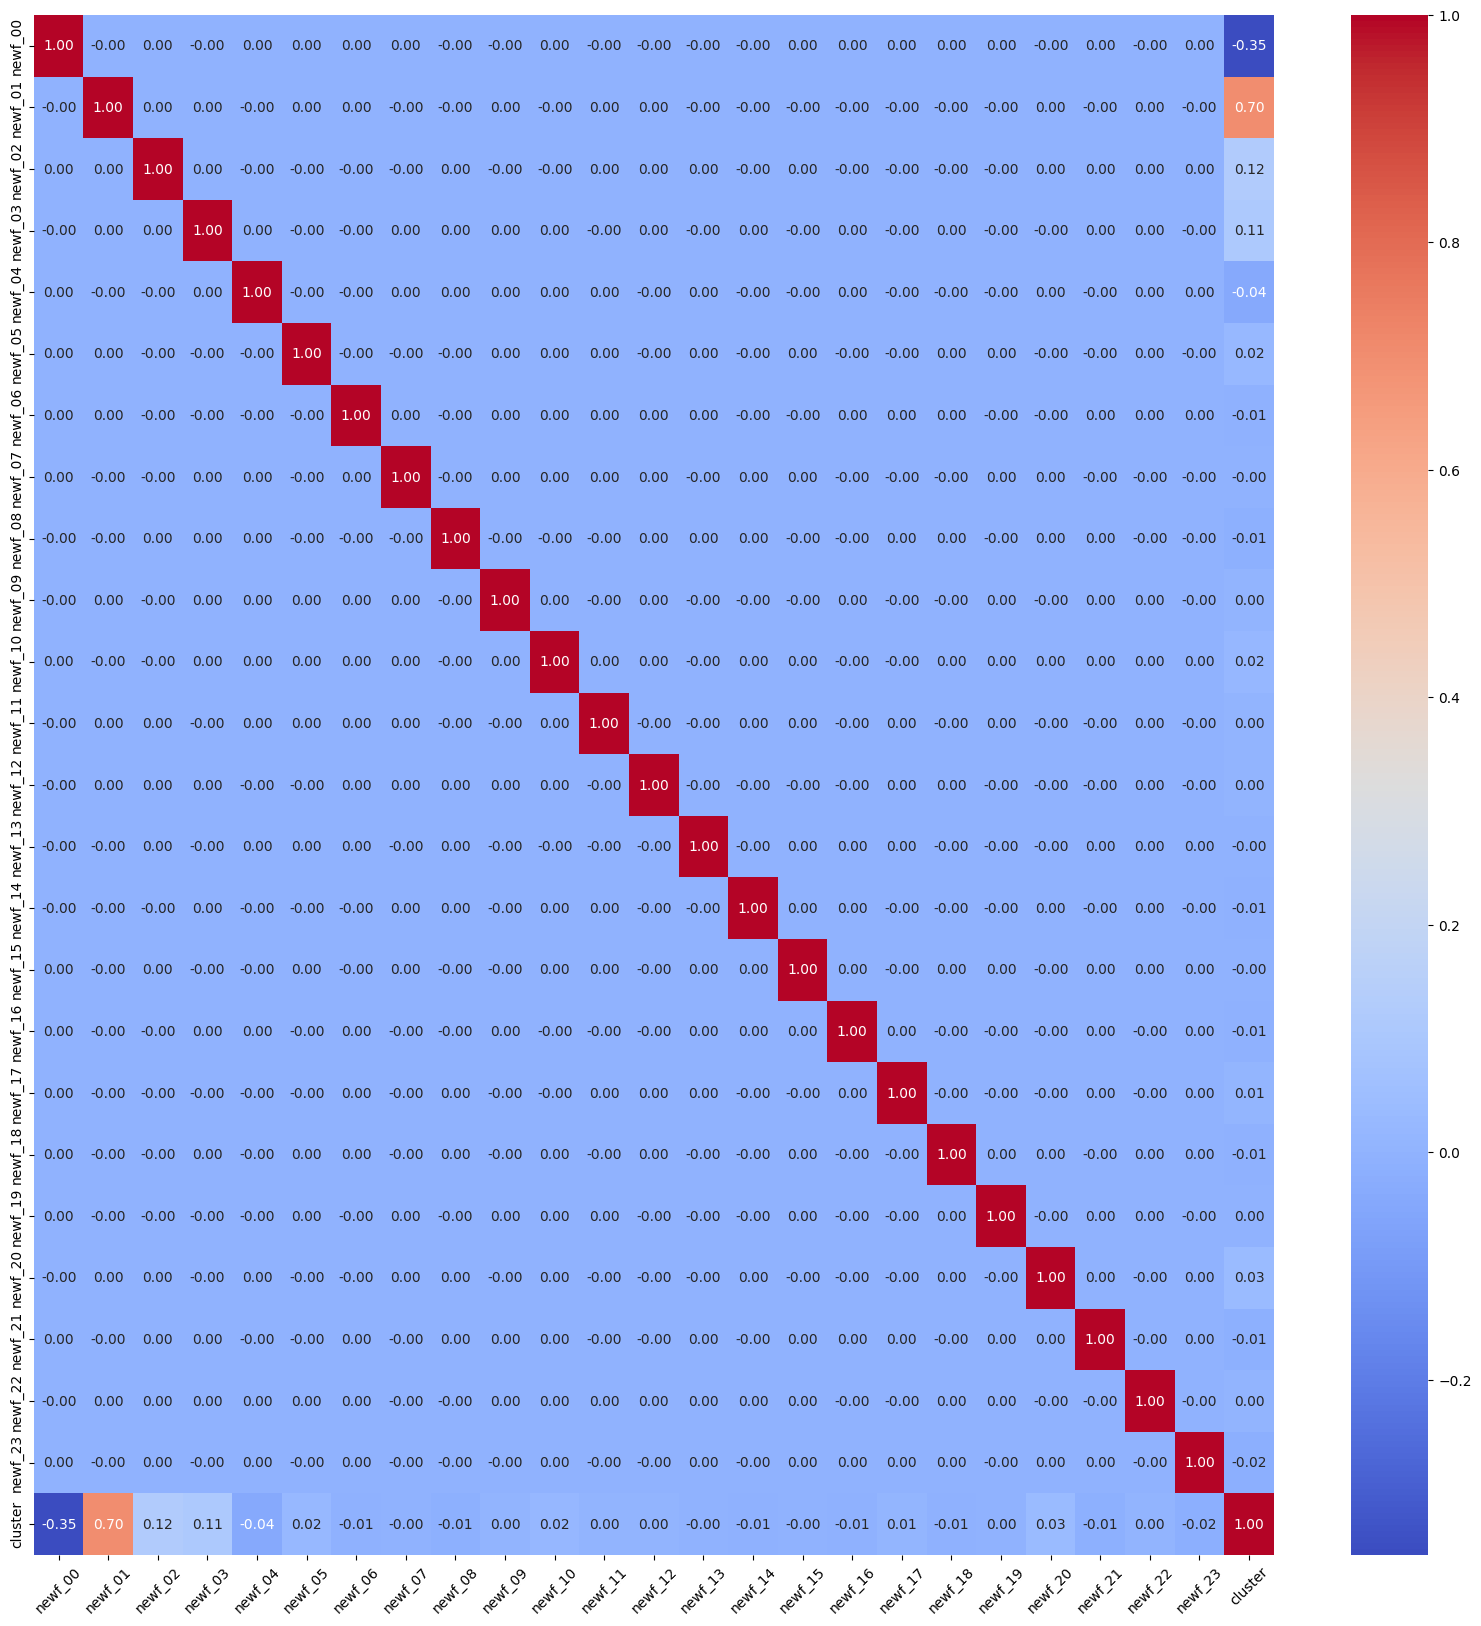

In [63]:
# Compute the correlation matrix
corr = df11.corr()

# Set up the figure
fig, ax = plt.subplots(figsize=(20,20))

# Generate the heatmap
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f',
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.show()


##Kmeans clustering

In [ ]:
import sklearn.cluster as cluster
import sklearn.metrics as metrics
#silhoutte method to obtain optimal no. of clusters for our dataset, higher value indicates optimal cluster
silhoutte_scores=[]
for i in range(2,10):
    labels=cluster.KMeans(n_clusters=i,random_state=200).fit(df11).labels_
    silhoutte_scores.append(metrics.silhouette_score(df11,labels,metric="euclidean",sample_size=1000,random_state=200))
for i in range(2,10):
  print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(silhoutte_scores[i-2]))
  
print('\n\n')
print(f"Max silhoutte scores is {max(silhoutte_scores)}")

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

Silhouette score for k(clusters) = 2 is 0.41906567318421994
Silhouette score for k(clusters) = 3 is 0.4063175462802152
Silhouette score for k(clusters) = 4 is 0.26253001487041605
Silhouette score for k(clusters) = 5 is 0.1371067740563578
Silhouette score for k(clusters) = 6 is 0.13107904103731988
Silhouette score for k(clusters) = 7 is 0.04587637379497807
Silhouette score for k(clusters) = 8 is 0.04409033361216535
Silhouette score for k(clusters) = 9 is 0.04397876993776002



Max silhoutte scores is 0.41906567318421994


`MAXIMUM SILHOUTTE SCORE IS FOR K=2(NUMBER OF CLUSTERS=2)`

In [ ]:
km2 = KMeans(n_clusters=3)
y_predicted2 = km2.fit_predict(df11)
y_predicted2

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 1, 2, ..., 0, 0, 2], dtype=int32)

In [ ]:
df11['cluster']=y_predicted2
df11

,newf_00,newf_01,newf_02,newf_03,newf_04,newf_05,newf_06,newf_07,newf_08,newf_09,...,newf_15,newf_16,newf_17,newf_18,newf_19,newf_20,newf_21,newf_22,newf_23,cluster
0,0.204550,0.228294,0.023095,-0.118640,0.007781,-0.159891,0.077065,0.088241,-0.081394,0.101852,...,0.162209,-0.085302,0.132594,-0.014048,-0.098272,-0.008272,0.045969,-0.026155,-0.031809,2
1,-0.820463,-0.137815,-0.107904,-0.098156,0.031694,-0.031296,0.099782,0.023826,-0.150376,0.236890,...,0.075763,0.136708,-0.047496,0.086171,-0.021937,-0.070221,0.121885,-0.010835,-0.056054,1
2,0.175453,0.161990,0.065668,-0.020555,0.091347,-0.122462,-0.028852,-0.027432,0.097570,-0.122175,...,0.024268,0.247706,0.150910,0.003192,-0.170105,0.054815,-0.159211,-0.103755,0.090537,2
3,1.208765,-0.034065,-0.109215,-0.054181,-0.024289,0.164205,0.001170,-0.025889,0.048655,-0.107115,...,0.003423,0.081505,-0.141611,-0.058911,0.171513,-0.017639,0.090923,0.070885,0.061334,0
4,-0.827476,-0.176751,-0.061269,0.083890,0.229630,0.019809,-0.190971,0.122582,-0.027837,-0.056202,...,0.050118,0.140613,-0.054383,-0.221303,-0.053356,-0.061857,0.091094,-0.098010,-0.123310,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97995,-0.793177,-0.027646,-0.036305,0.020074,0.053622,0.085944,0.028867,-0.165690,0.078869,0.156758,...,-0.045424,0.026597,0.105699,-0.018926,0.007646,-0.065194,0.012141,-0.012033,0.006145,1
97996,-0.838217,-0.072673,0.042399,-0.016298,0.111706,-0.184006,-0.133412,-0.052676,0.016327,-0.009059,...,0.047295,-0.145915,-0.029522,0.088780,0.159209,-0.104798,0.027869,-0.036935,0.099042,1
97997,1.200513,0.007189,0.090111,0.022402,0.032243,-0.089784,-0.175578,0.086392,0.055752,0.135737,...,0.115503,-0.138844,-0.145482,-0.002658,-0.217080,0.004896,0.014153,-0.031215,-0.121623,0
97998,1.193285,-0.115204,0.142517,-0.121632,0.150213,0.005326,0.064088,-0.251634,0.103418,-0.156680,...,0.097170,0.019099,-0.039152,0.064295,0.119619,-0.109386,0.044647,-0.017401,0.042004,0


In [ ]:
km2.cluster_centers_

array([[ 1.22073215e+00, -1.28389224e-01, -1.97883030e-02,
        -1.59069879e-02,  5.83598452e-03, -3.56379329e-03,
         8.75061567e-04,  4.53717100e-04,  1.87979749e-03,
        -1.67219858e-04, -2.47243897e-03, -1.36839715e-04,
        -2.46338545e-04,  1.65735452e-04,  9.52723252e-04,
         4.28749485e-04,  9.27402888e-04, -8.95943411e-04,
         1.10221342e-03,  4.03838779e-05, -4.29138565e-03,
         1.72320249e-03, -6.97363183e-04,  2.65475609e-03],
       [-8.08368439e-01, -7.13137141e-02, -1.05913942e-02,
        -6.90636904e-03,  1.71261773e-03, -1.07931120e-03,
         3.49400299e-04,  1.46508463e-04,  8.45439944e-04,
        -3.04571651e-05, -1.16048555e-03, -7.72359807e-05,
        -1.25019976e-04,  3.30042467e-05,  4.29651833e-04,
         1.85046680e-04,  3.74758122e-04, -3.36972157e-04,
         3.28666897e-04, -6.00212914e-05, -1.81369110e-03,
         7.56636292e-04,  1.39041412e-04,  4.91985691e-04],
       [ 1.98030022e-01,  1.74630536e-01,  2.64152432e

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

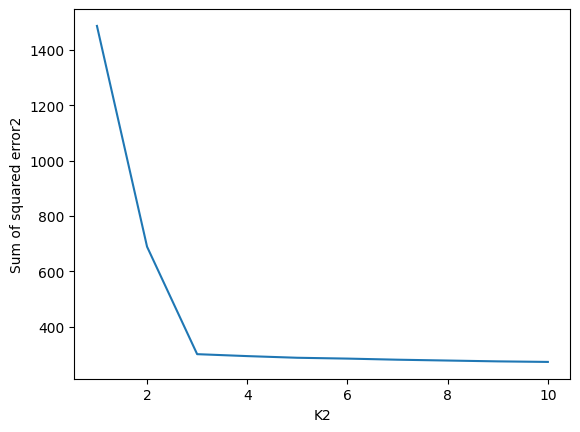

In [ ]:
sse2 = []
k_rng2 = range(1,11)
for k2 in k_rng2:
    km2 = KMeans(n_clusters=k2)
    km2.fit(df11)
    sse2.append(km2.inertia_//100)
plt.xlabel('K2')
plt.ylabel('Sum of squared error2')
plt.plot(k_rng2,sse2)

With PCA on the same dataset but reduced columns we got `k=3` as the elbow point and this is the best number of clustering option

FOR K=2 AND K=3 SILHOUTTE SCORE WAS ALMOST SAME BUT ELBOW POINT IS FOR K=3.
ALTHOUGH IT IMPLIES K=3 CAN BE OUR BEST OPTION BUT NOW INSTEAD OF USING VARIANCE RETAINED=0.95 ,LET US USE NUMBER OF PRINCIPAL COMPONENTS =2 FOR THIS SAME DATASET

##Using PCA with n_components=2

In [90]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
pca_df11 = pd.DataFrame(data = principalComponents
             , columns = ['principal_component 1', 'principal_component 2'])
pca_df11.head()

,principal_component 1,principal_component 2
0,-0.139434,0.165645
1,-0.042648,-0.250119
2,-0.185915,-0.008528
3,0.146817,0.067650
4,-0.035145,-0.298856


In [91]:
pca.explained_variance_ratio_

array([0.08454616, 0.06116386])

In [92]:

#silhoutte method to obtain optimal no. of clusters for our dataset, higher value indicates optimal cluster
silhoutte_scores2=[]
for i in range(2,10):
    labels2=cluster.KMeans(n_clusters=i,random_state=200).fit(pca_df11).labels_
    silhoutte_scores2.append(metrics.silhouette_score(pca_df11,labels2,metric="euclidean",sample_size=1000,random_state=200))
for i in range(2,10):
  print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(silhoutte_scores2[i-2]))
  
print('\n\n')
print(f"Max silhoutte scores is {max(silhoutte_scores2)}")

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

Silhouette score for k(clusters) = 2 is 0.3518616988934762
Silhouette score for k(clusters) = 3 is 0.37073686510901266
Silhouette score for k(clusters) = 4 is 0.327300805414025
Silhouette score for k(clusters) = 5 is 0.3191606715130173
Silhouette score for k(clusters) = 6 is 0.3270527186367616
Silhouette score for k(clusters) = 7 is 0.3381390629944533
Silhouette score for k(clusters) = 8 is 0.3340872840406323
Silhouette score for k(clusters) = 9 is 0.3315073276758161



Max silhoutte scores is 0.37073686510901266


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

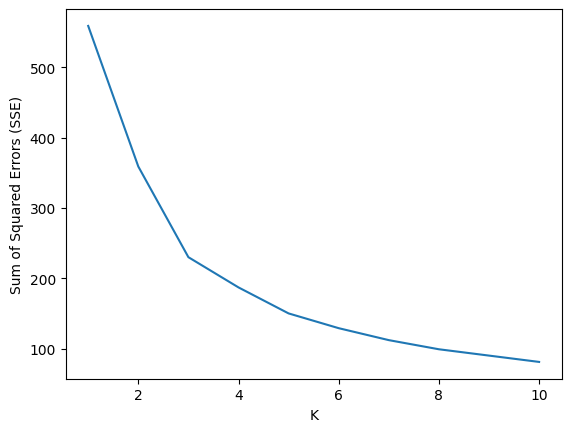

In [94]:
K3=range(1,11)
sse3 = []
for k3 in K3:
    kmeans3=cluster.KMeans(n_clusters=k3)
    kmeans3=kmeans3.fit(pca_df11)
    sse_iter = kmeans3.inertia_
    sse3.append(sse_iter//10)

plt.xlabel('K')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.plot(K3,sse3)

`With n_components=2 we are getting k=3 as the elbow point or the best value for number of clusters parameter.`



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='principal_component 1', ylabel='principal_component 2'>

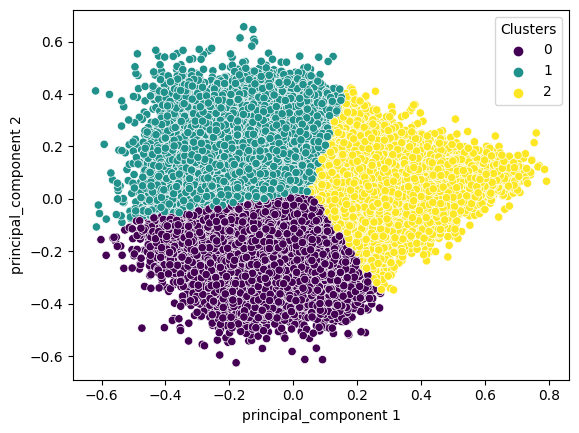

In [96]:
kmeans = cluster.KMeans(n_clusters=3)
kmeans = kmeans.fit(pca_df11)
#plotting the clusters
pca_df11['Clusters'] = kmeans.labels_
sns.scatterplot(x="principal_component 1", y="principal_component 2",hue = 'Clusters',  data=pca_df11,palette='viridis')

###APPLYING ICA (Independent Component Analysis) AND DOING THINGS  

In [ ]:
from sklearn.decomposition import FastICA

df5=df2
# create an instance of the FastICA class
ica = FastICA(n_components=2, random_state=42)

# fit the ICA model to your data
ica.fit(df5)

# transform the original data to independent components
X_ica = ica.transform(df5)
X_ica.shape


/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


(98000, 2)

In [ ]:
ica_df = pd.DataFrame(data = X_ica, columns = ['IC1','IC2'])
ica_df.head()

,IC1,IC2
0,0.003638,-0.002379
1,-0.001135,0.004023
2,0.002536,-0.001801
3,-0.002429,-0.004244
4,-0.001798,0.004325


In [ ]:

#silhoutte method to obtain optimal no. of clusters for our dataset, higher value indicates optimal cluster
silhoutte_scores3=[]
for i in range(2,10):
    labels3=cluster.KMeans(n_clusters=i,random_state=200).fit(ica_df).labels_
    silhoutte_scores3.append(metrics.silhouette_score(ica_df,labels3,metric="euclidean",sample_size=1000,random_state=200))
for i in range(2,10):
  print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(silhoutte_scores3[i-2]))
  
print('\n\n')
print(f"Max silhoutte scores is {max(silhoutte_scores3)}")

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

Silhouette score for k(clusters) = 2 is 0.49806875783932275
Silhouette score for k(clusters) = 3 is 0.6471727359635799
Silhouette score for k(clusters) = 4 is 0.5933073051177475
Silhouette score for k(clusters) = 5 is 0.5662926557005535
Silhouette score for k(clusters) = 6 is 0.5746576792932431
Silhouette score for k(clusters) = 7 is 0.572103120348381
Silhouette score for k(clusters) = 8 is 0.5453775227037398
Silhouette score for k(clusters) = 9 is 0.5332712320286378



Max silhoutte scores is 0.6471727359635799


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

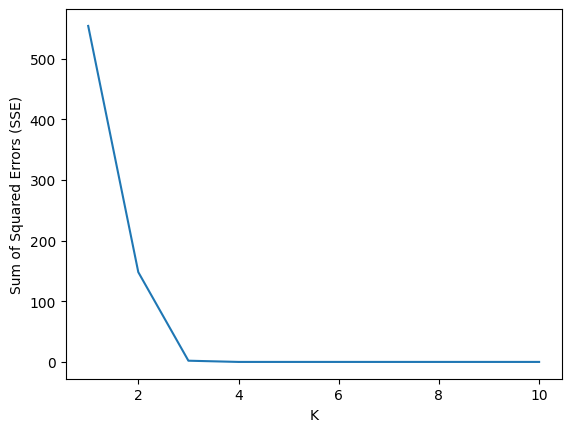

In [64]:
K4=range(1,11)
sse4 = []
for k4 in K4:
    kmeans4=cluster.KMeans(n_clusters=k4)
    kmeans4=kmeans4.fit(ica_df)
    sse_iter2 = kmeans4.inertia_
    sse4.append(sse_iter2//100)

plt.xlabel('K')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.plot(K4,sse4)

k=3 is the best parameter for number of clusters

##DBSCAN ON ICA DATASET

`USED KNN ALGORITIHM FOR GETTING BEST ESTIMATE OF EPSILON AND CORRESPONDING MIN_SAMPLES`

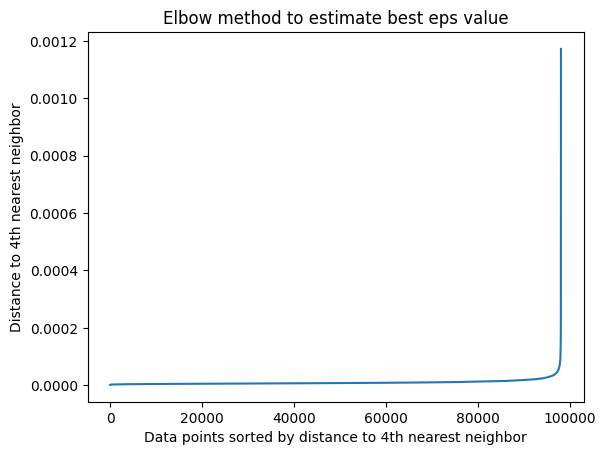

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# create an instance of the NearestNeighbors class with k=4
knn = NearestNeighbors(n_neighbors=4)

# fit the knn model to your data
knn.fit(ica_df)

# calculate the distances to the kth nearest neighbor for each point
distances, indices = knn.kneighbors()

# sort the distances in ascending order and plot them
sorted_distances = np.sort(distances[:,3])
plt.plot(sorted_distances)

# use the elbow method to estimate the best value of eps
plt.xlabel("Data points sorted by distance to 4th nearest neighbor")
plt.ylabel("Distance to 4th nearest neighbor")
plt.title("Elbow method to estimate best eps value")
plt.show()


In [ ]:
from kneed import KneeLocator
kneedle = KneeLocator(range(len(sorted_distances)), sorted_distances, curve='convex', direction='increasing')
eps = sorted_distances[kneedle.elbow]
print("Estimated value of eps:", eps)


Estimated value of eps: 0.00013773022381628988


<Axes: xlabel='IC1', ylabel='IC2'>

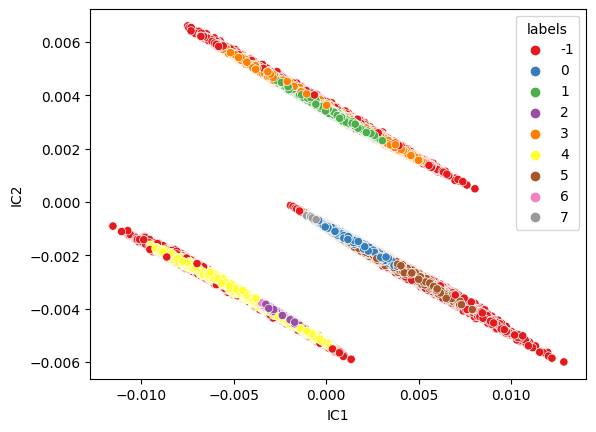

In [50]:
from sklearn.cluster import DBSCAN


# Set the hyperparameters
epsilon = 0.00013773022381628988  #Estimated value of epsilon from above code cell
min_samples = 30

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
labels = dbscan.fit_predict(ica_df)

ica_df['labels']=labels


sns.scatterplot(x=ica_df["IC1"], y=ica_df["IC2"],hue = 'labels',  data=df_new,palette='Set1')